## Data Overview & Preprocessing Dataset: Tesla Stock Data

## Source: Investing.com

Date Range: January 2, 2020 – February 4, 2025

### Features Used:

- Price: Closing stock price
- Open, High, Low: Daily price fluctuations
- Vol.: Trading volume (converted from K/M to numerical values)
- Change %: Percentage change in price (converted to float)

### Data Preprocessing Steps:

- Converted 'Date' to datetime format
- Cleaned 'Vol.' and 'Change %' columns
- Ensured no missing values
- Created lag features for forecastin



## Exploratory Data Analysis(EDA)

In [ ]:
import pandas as pd

df = pd.read_csv('Tesla Stock Price History.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/17/2025,426.50,421.50,439.74,419.75,94.99M,3.06%
1,01/16/2025,413.82,423.49,424.00,409.13,68.34M,-3.36%
2,01/15/2025,428.22,409.90,429.80,405.66,81.38M,8.04%
3,01/14/2025,396.36,414.34,422.64,394.54,84.57M,-1.72%
4,01/13/2025,403.31,383.21,403.79,380.07,67.58M,2.17%


In [ ]:
df.dropna(inplace=True)

In [ ]:
cols_to_convert = ['Price', 'Open', 'High', 'Low']
df[cols_to_convert] = df[cols_to_convert].replace(',', '', regex=True).astype(float)

In [ ]:
df['Vol.'] = df['Vol.'].replace({'M': '*1e6'}, regex=True).map(pd.eval).astype(float)

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/17/2025,426.50,421.50,439.74,419.75,94990000.0,3.06%
1,01/16/2025,413.82,423.49,424.00,409.13,68340000.0,-3.36%
2,01/15/2025,428.22,409.90,429.80,405.66,81380000.0,8.04%
3,01/14/2025,396.36,414.34,422.64,394.54,84570000.0,-1.72%
4,01/13/2025,403.31,383.21,403.79,380.07,67580000.0,2.17%


In [ ]:
df['Change %'] = df['Change %'].str.replace('%', '', regex=False).astype(float)

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/17/2025,426.50,421.50,439.74,419.75,94990000.0,3.06
1,01/16/2025,413.82,423.49,424.00,409.13,68340000.0,-3.36
2,01/15/2025,428.22,409.90,429.80,405.66,81380000.0,8.04
3,01/14/2025,396.36,414.34,422.64,394.54,84570000.0,-1.72
4,01/13/2025,403.31,383.21,403.79,380.07,67580000.0,2.17


In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [ ]:
print("Dataset Information:")
print(df.info())

print("\nBasic Statistics Summary:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1509 non-null   object 
 1   Price     1509 non-null   float64
 2   Open      1509 non-null   float64
 3   High      1509 non-null   float64
 4   Low       1509 non-null   float64
 5   Vol.      1509 non-null   float64
 6   Change %  1509 non-null   float64
dtypes: float64(6), object(1)
memory usage: 82.7+ KB
None

Basic Statistics Summary:
             Price         Open         High          Low          Vol.  \
count  1509.000000  1509.000000  1509.000000  1509.000000  1.509000e+03   
mean    183.749284   183.777860   187.914135   179.381140  1.275613e+08   
std     106.168199   106.274252   108.657604   103.615095  8.060468e+07   
min      11.930000    12.070000    12.450000    11.800000  2.940000e+07   
25%      99.000000    98.000000   100.880000    94.730000  7.8

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1400x600 with 0 Axes>

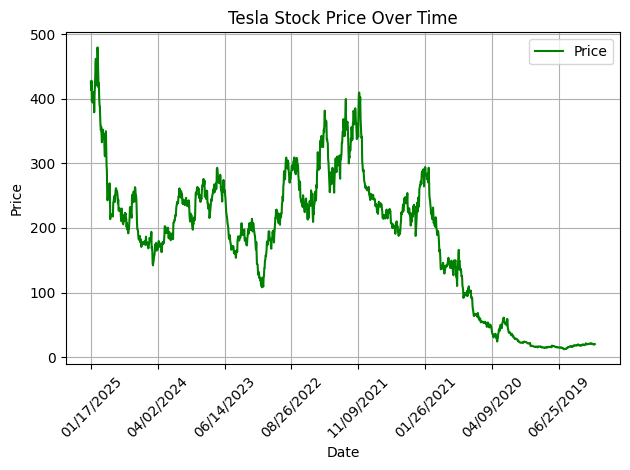

In [ ]:
plt.figure(figsize=(14, 6))
df.plot(x='Date', y='Price', title='Tesla Stock Price Over Time', xlabel='Date', ylabel='Price', color='green')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

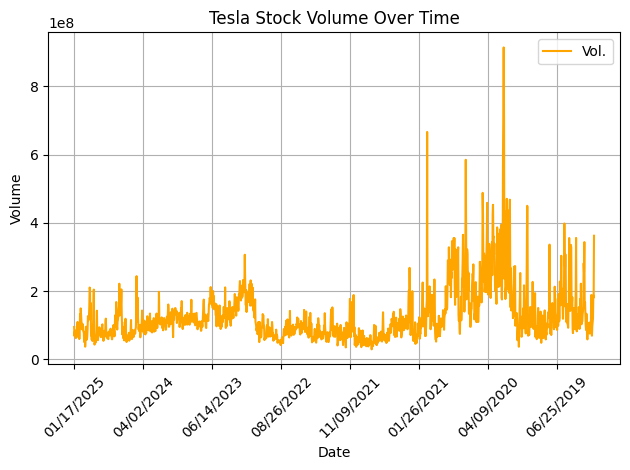

In [ ]:
# Time series plot of volume over time
plt.figure(figsize=(14, 6))
df.plot(x='Date', y='Vol.', title='Tesla Stock Volume Over Time', xlabel='Date', ylabel='Volume', color='orange')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

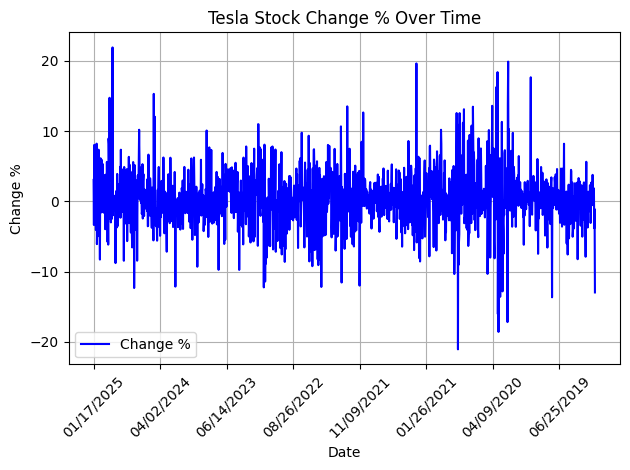

In [ ]:
# Plot the change percentage over time
plt.figure(figsize=(14, 6))
df.plot(x='Date', y='Change %', title='Tesla Stock Change % Over Time', xlabel='Date', ylabel='Change %', color='blue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

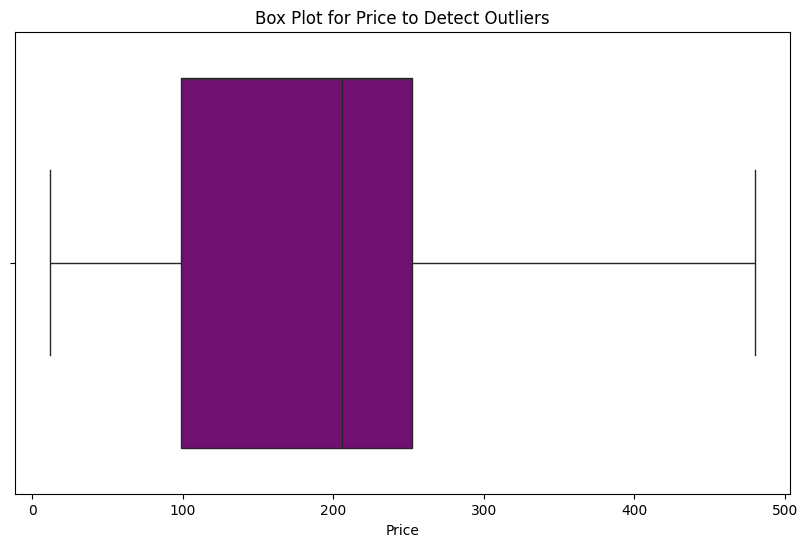

In [ ]:
# Box plot for detecting outliers in 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'], color='purple')
plt.title('Box Plot for Price to Detect Outliers')
plt.show()

In [ ]:
df['Price Change %'] = df['Price'].pct_change() * 100

threshold = 5

sudden_changes = df[df['Price Change %'].abs() >= threshold]

print("Days with sudden price changes:")
print(sudden_changes[['Date', 'Price', 'Price Change %']])

Days with sudden price changes:
            Date   Price  Price Change %
3     01/14/2025  396.36       -7.440101
10    01/02/2025  379.28       -7.591853
11    12/31/2024  403.84        6.475427
14    12/26/2024  454.13        5.205486
16    12/23/2024  430.60       -6.852990
...          ...     ...             ...
1442  04/25/2019   16.51        5.293367
1457  04/03/2019   19.45        8.963585
1471  03/14/2019   19.33        5.283224
1481  02/28/2019   21.33        8.549618
1483  02/26/2019   19.86       -5.338418

[251 rows x 3 columns]


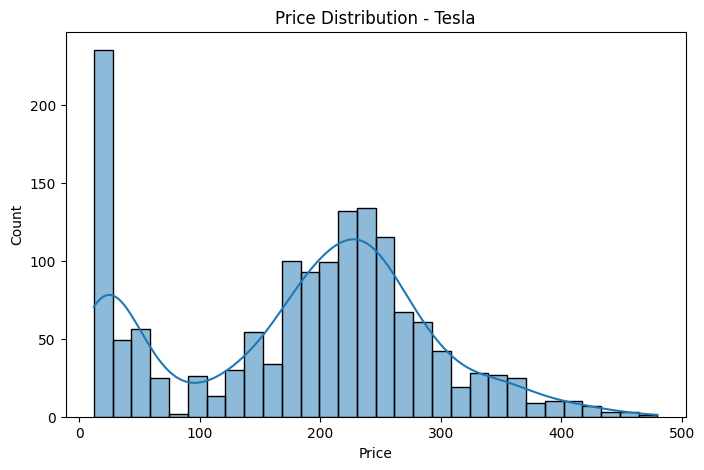

In [ ]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Price Distribution - Tesla")
plt.show()

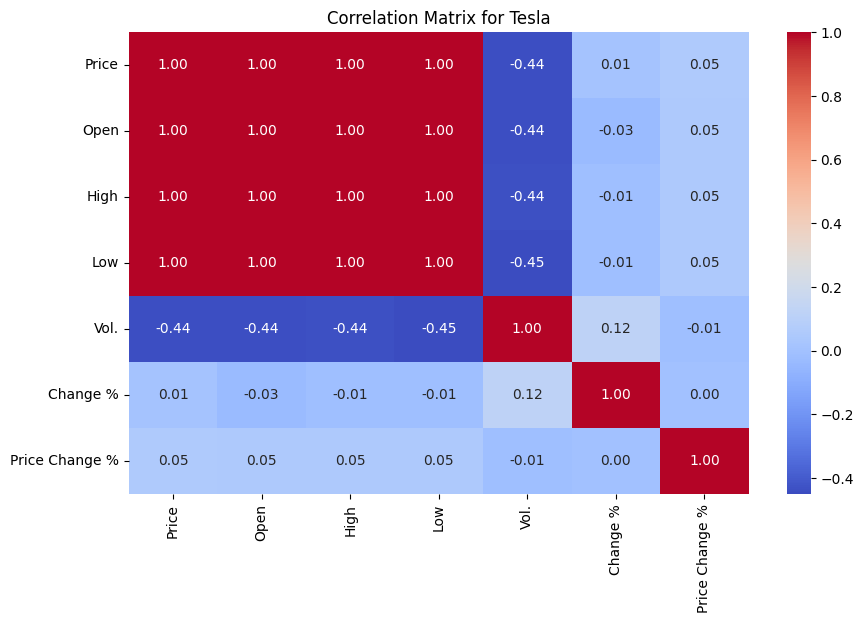

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Tesla")
plt.show()

 The correlation matrix helps identify relationships between numerical variables in the dataset.
 We first converted the 'Date' column to datetime format to ensure it's not included in calculations.

 Then, we selected only numerical columns (Price, Open, High, Low, Volume, Change %) for correlation analysis.
 The correlation values range from -1 to 1:
    
- Positive values indicate a direct relationship (as one variable increases, the other also increases).
  
    
- Negative values indicate an inverse relationship (as one increases, the other decreases).
  
- Values close to 0 suggest no significant relationship.

This analysis helps in feature selection for predictive modeling, as highly correlated variables might be redundant.








In [ ]:
df['7-day MA'] = df['Price'].rolling(window=7).mean()
df['30-day Volatility'] = df['Price'].rolling(window=30).std()

## Feature Engineering

- Used in time series forecasting models (e.g., ARIMA, LSTM).
- Helps smooth short-term fluctuations in stock price analysis.
- Can be used as a feature in regression models to predict future stock prices.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['Open', 'High', 'Low', 'Price', 'Vol.']
scaled_data = StandardScaler().fit_transform(df[features])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.84789136 0.15150115]


The Explained Variance Ratio tells us how much of the original data’s "spread" or variation is captured by each new component (or factor) after performing PCA (Principal Component Analysis). In this case, the first component explains 84.8% of the data's variation, and the second one explains 15.2%. This helps us understand how well the new components represent the data, and how much information is preserved when we reduce the number of features.